## <b> Fake News Classifier </b>

Using Natural Language Processing, the aim of this project is to build a model that can classify fake news from real news

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [22]:
import re
import string

In [3]:
import sys
sys.path.insert(0, '')
import nlp_utils as nu

In [6]:
df = pd.read_csv('train.csv', index_col = 'id')
df

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0


In [9]:
df.rename(columns = {'title': 'headline'}, inplace=True)
df

,headline,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0


In [12]:
# Sample headline, text pair
df['headline'][0], df['text'][0]

('House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It',
 'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the Hou

Check for imbalance

<AxesSubplot:>

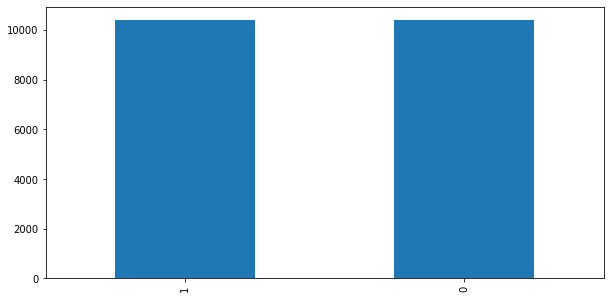

In [15]:
df['label'].value_counts().plot.bar(figsize = (10,5))

Check for null values

In [17]:
df.isnull().sum()

headline     558
author      1957
text          39
label          0
dtype: int64

In [19]:
df.dropna(inplace=True)
df.isnull().sum()

headline    0
author      0
text        0
label       0
dtype: int64

In [21]:
df.reset_index(inplace=True)

Check for imbalance

<AxesSubplot:>

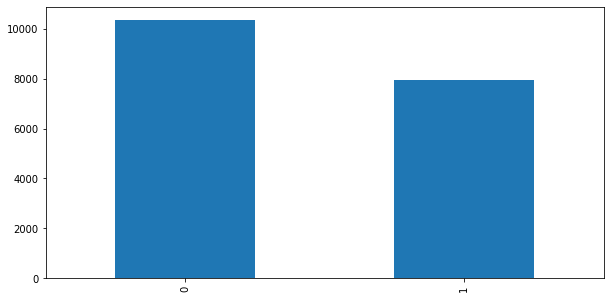

In [20]:
df['label'].value_counts().plot.bar(figsize = (10,5))

### Text Cleaning

In [23]:
# Remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# Convert strings to lowercase, and removes punctuation
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n'
remove_n = lambda x: re.sub('\n', ' ', x)

# Remove all non-ascii characters
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]', r' ', x)

# Apply the lambda functions
df['text'] = df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

### Stemming and Removal of Stop Words

In [24]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [25]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

### Splitting the DataFrame

In [ ]:
y = df['label']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(corpus, y, test_size = 0.3, random_state=40)

### Vectorization

Tfidf Vectorizer

In [ ]:
tfidf_vect = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
tfidf_train = tfidf_vect.fit_transform(Xtrain)
tfidf_test = tfidf_vect.transform(Xtest)

Count Vectorizer

In [ ]:
count_vect = CountVectorizer(stop_words = 'english', max_df = 0.7)
count_train = count_vect.fit_transform(Xtrain)
count_test = count_vect.transform(Xtest)

### Model Building

#### 1. Naive Bayes

Tfidf-Vectorized

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [ ]:
clf = MultinomialNB().fit(tfidf_train, ytrain)

# Accuracy on train set
print(f'Model train accuracy: {clf.score(tfidf_train, ytrain)*100}%')

# Accuracy on test set
print(f'Model train accuracy: {clf.score(tfidf_test, ytest)*100}%')

# Confusion Matrix
train_pred = clf.predict(tfidf_train)
test_pred = clf.predict(tfidf_test)
print('Confusion Matrix train is:\n', confusion_matrix(ytrain, train_pred))
print('Confusion Matrix test is:\n', confusion_matrix(ytest, test_pred))

Count Vectorized

In [ ]:
clf = MultinomialNB().fit(count_train, ytrain)

# Accuracy on train set
print(f'Model train accuracy: {clf.score(count_train, ytrain)*100}%')

# Accuracy on test set
print(f'Model train accuracy: {clf.score(count_test, ytest)*100}%')

# Confusion Matrix
train_pred = clf.predict(count_train)
test_pred = clf.predict(count_test)
print('Confusion Matrix train is:\n', confusion_matrix(ytrain, train_pred))
print('Confusion Matrix test is:\n', confusion_matrix(ytest, test_pred))

#### 2. Random Forest

Tfidf-Vectorized

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier().fit(tfidf_train, ytrain)

# Accuracy on train set
print(f'Model train accuracy: {clf.score(tfidf_train, ytrain)*100}%')

# Accuracy on test set
print(f'Model train accuracy: {clf.score(tfidf_test, ytest)*100}%')

# Confusion Matrix
train_pred = clf.predict(tfidf_train)
test_pred = clf.predict(tfidf_test)
print('Confusion Matrix train is:\n', confusion_matrix(ytrain, train_pred))
print('Confusion Matrix test is:\n', confusion_matrix(ytest, test_pred))

Count Vectorized

In [ ]:
clf = RandomForestClassifier().fit(count_train, ytrain)

# Accuracy on train set
print(f'Model train accuracy: {clf.score(count_train, ytrain)*100}%')

# Accuracy on test set
print(f'Model train accuracy: {clf.score(count_test, ytest)*100}%')

# Confusion Matrix
train_pred = clf.predict(count_train)
test_pred = clf.predict(count_test)
print('Confusion Matrix train is:\n', confusion_matrix(ytrain, train_pred))
print('Confusion Matrix test is:\n', confusion_matrix(ytest, test_pred))

#### 3. K-Nearest Neighbors

Tfidf Vectorized

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier().fit(tfidf_train, ytrain)

# Accuracy on train set
print(f'Model train accuracy: {clf.score(tfidf_train, ytrain)*100}%')

# Accuracy on test set
print(f'Model train accuracy: {clf.score(tfidf_test, ytest)*100}%')

# Confusion Matrix
train_pred = clf.predict(tfidf_train)
test_pred = clf.predict(tfidf_test)
print('Confusion Matrix train is:\n', confusion_matrix(ytrain, train_pred))
print('Confusion Matrix test is:\n', confusion_matrix(ytest, test_pred))

Count Vectorized

In [ ]:
clf = KNeighborsClassifier().fit(count_train, ytrain)

# Accuracy on train set
print(f'Model train accuracy: {clf.score(count_train, ytrain)*100}%')

# Accuracy on test set
print(f'Model train accuracy: {clf.score(count_test, ytest)*100}%')

# Confusion Matrix
train_pred = clf.predict(count_train)
test_pred = clf.predict(count_test)
print('Confusion Matrix train is:\n', confusion_matrix(ytrain, train_pred))
print('Confusion Matrix test is:\n', confusion_matrix(ytest, test_pred))

### Conclusion

In this project, fake news classification was carried out on 20,000+ setences. Preprocessing was carried out on the data by applications of stemming, lemmatization, removal of special characters and stop words, etc. The TFIDFVectorizer and CountVectorizer were used to vectorize the sentences before the data was exposed to the series of machine learning models used. The scope of this project cuts across detection of false news, in order to avoid panic in society.